<center><img width ='20%' src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" ></center>

# Analisando a Violência no Rio de Janeiro

Entre os aspectos que mais atingem a vida dos cidadãos brasileiros está a violência urbana. Definida como uma série de práticas prejudiciais que inclui assaltos, agressões e homicídios em cidades, tal ocorrência afeta diretamente o cotidiano dos indivíduos que vivem no Brasil e se sentem inseguros ao precisarem sair de casa. Esse tipo de incidente se propaga, sobretudo, por conta da desigualdade social, que incentiva a criminalidade, e do enfrentamento equivocado do Estado por meio de métodos pouco eficazes, que podem piorar a situação.

## Obtenção dos Dados

Os dados foram retirados do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do dataset a ser utilizado aqui, o arquivo csv pode ser baixado diretamente neste [link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv)

### Importando os dados

Importe os dados, usando `df = pd.read_csv("endereço_do_csv")`

In [0]:
# importando bibliotecas
import pandas as pd
import seaborn as sns

%matplotlib inline

rj_df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv")



# Análise Exploratória
Consiste em **resumir** e **organizar** os dados coletados através de tabelas, gráficos ou medidas numéricas, e a partir dos dados resumidos procurar alguma regularidade ou padrão nas observações (interpretar os dados). A partir dessa interpretação inicial é possível identificar se os dados seguem algum modelo conhecido, que permita estudar o fenômeno sob análise, ou se é necessário sugerir um novo modelo.


#### Dicionario das Variaveis: 
* `vano`                         
* `mes`
* `hom_doloso`
* `lesao_corp_morte` 
* `latrocinio`
* `hom_por_interv_policial`
* `tentat_hom`
* `lesao_corp_dolosa`
* `estupro`
* `hom_culposo`
* `lesao_corp_culposa`
* `roubo_comercio`
* `roubo_residencia`
* `roubo_veiculo`
* `roubo_carga`
* `roubo_transeunte`
* `roubo_em_coletivo`
* `roubo_banco`
* `roubo_cx_eletronico`
* `roubo_celular`
* `roubo_conducao_saque`
* `roubo_apos_saque`
* `roubo_bicicleta`
* `outros_roubos`
* `total_roubos`
* `furto_veiculos`
* `furto_transeunte`
* `furto_coletivo`
* `furto_celular`
* `furto_bicicleta`
* `outros_furtos`
* `total_furtos`
* `sequestro`
* `extorsao`
* `sequestro_relampago`
* `estelionato`
* `apreensao_drogas`
* `posse_drogas`
* `trafico_drogas`
* `apreensao_drogas_sem_autor`
* `recuperacao_veiculos`
* `apf`
* `aaapai`
* `cmp`
* `cmba`
* `ameaca`
* `pessoas_desaparecidas`
* `encontro_cadaver`
* `encontro_ossada`
* `pol_militares_mortos_serv`
* `pol_civis_mortos_serv`
* `indicador_letalidade`
* `indicador_roubo_rua`
* `indicador_roubo_veic`
* `registro_ocorrencias` 
* `fase`




## Qual o tamanho do seu DataFrame
A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

Em relação à dimensionalidade dos dados, nosso dataset é composto por 344 entradas e 56 colunas.


In [3]:
# Qual o tamanho do seu DataFrame
print("ENTRADAS E VARIAVEIS:")
print(f"Entradas: {rj_df.shape[0]}")
print(f"Variaveis: {rj_df.shape[1]}")

ENTRADAS E VARIAVEIS:
Entradas: 344
Variaveis: 56


Já as primeiras 5 entradas desse conjunto de dados permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [4]:
# Visualizar as 5 primeiras linhas (`head`)
rj_df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Algumas conclusões inicias:
* As variáveis `lesao_corp_morte`, `hom_por_interv_policial`,  `estupro`,  `hom_culposo`,  `pessoas_desaparecidas` , `encontro_ossada`,  `pol_militares_mortos_serv` ,  `pol_civis_mortos_serv`,  `registro_ocorrencias` todas apresentaram incialmente valores ausentes (NaN). Isso pode influenciar negativamente na qualidade das nossas análises.



Percebe-se que temos um total de 56 variaveis(colunas), mas nao foi possivel ver todas utilizando a função `.head()`.
Para isso vamos chamar o metodo `.columns`, que vai imprimir todos os nomes das colunas

In [5]:
#Extrair e imprimir os nomes das colunas (columns)
print("NOME DAS COLUNAS:")
print(rj_df.columns)

NOME DAS COLUNAS:
Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_

Vamos realizar o levantamento dos tipos de variáveis que compõem o DataFrame a fim de estabelecer a divisão entre as variáveis numéricas e as variáveis categóricas.

In [6]:
#Quais os tipos das variáveis (dtypes)
print(rj_df.dtypes)

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Através do levantamento dos tipos das variaveis podemos concluir que nosso *dataset* possui apenas tipos numericos 

## Valores Ausentes
Um passo importante na analise de dados é verificação de dados ausentes, isso porque a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [7]:
#Identifique a porcentagem de valores ausentes das colunas
((rj_df.isnull().sum()/ rj_df.shape[0])*100).sort_values(ascending=False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Como podemos ver temos um dataset com um numero expressivo de valores ausentes. Variaveis com mais de 20% de dados ausentes e outras com mais de 50% o que torna inviável o uso dessa variável. Caso se desejasse realmente usar, seria necessária uma etapa de coleta de dados a partir de outras fontes.



## Informações Estatísticas da Violência no Rio de Janeiro

Uma das maneiras mais simples de se iniciar uma análise exploratória das variáveis numéricas é utilizando o método describe().

Imediatamente você obtém um resumo contendo algumas das principais informações estatísticas relevantes:

* count - quantidade de entradas válidas
* mean - média dos valores
* std - desvio padrão
* min - menor valor da coluna
* 25% - percentil 25
* 50% - percentil 50 (e mediana)
* 75% - percentil 75
* max - maior valor da coluna




In [8]:
#Imprima o resumo estatístico do seu DataFrame (describe)
rj_df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

In [9]:
"""
Encontre as médias das seguintes variáveis (colunas):
roubo_veiculo
furto_veiculos
recuperacao_veiculos
"""

# media roubo_veiculo
print(f"Media roubo de veiculos: {round(rj_df.roubo_veiculo.mean(),2)}")
# media furto_veiculos
print(f"Media furto de veiculos: {round(rj_df.furto_veiculos.mean(),2)}")
# media de recuperacao_veiculos
print(f"Media recuperacao de veiculos: {round(rj_df.recuperacao_veiculos.mean(),2)}\n")


# Calcule qual a porcentagem de carros recuperados em relação aos carros roubados + carros furtados:
recu_veic = rj_df.recuperacao_veiculos.sum()
roub_veic = rj_df.roubo_veiculo.sum()
furt_veic = rj_df.furto_veiculos.sum()
porcen = ((recu_veic)/(roub_veic + furt_veic))

print(f"Porcentagem de carros recuperados: {round(porcen*100,0)}%\n")

print("VALORES MAX E MIN - HOMICIDIO DOLOSO:")
print(f"Max: {rj_df.hom_doloso.max()}")
print(f"Min: {rj_df.hom_doloso.min()}")

Media roubo de veiculos: 2448.7
Media furto de veiculos: 1674.67
Media recuperacao de veiculos: 1772.24

Porcentagem de carros recuperados: 43.0%

VALORES MAX E MIN - HOMICIDIO DOLOSO:
Max: 831
Min: 272


## Visualização de Dados

Visualização de dados é a apresentação de informações quantitativas em uma forma gráfica. Em outras palavras, as visualizações de dados transformam grandes e pequenos conjuntos de dados em visuais que são mais fáceis para o cérebro humano entender e processar.

* Histograma de `hom_doloso`
* Gráfico de linhas para a variável `roubo_em_coletivo`


### Homicídio doloso
O homicídio doloso é quando uma pessoa mata outra intencionalmente. Este tipo de homicídio pode ser classificado como de dolo direto, ou seja, quando o indivíduo realmente deseja matar outra pessoa; ou dolo indireto, quando o indivíduo não tem o propósito de matar, mas é o responsável por organizar algum evento que causa a morte de alguém por consequência.

O homicídio doloso está previsto no artigo 121, p. 1-2 do Código Penal Brasileiro.

Um histograma é um gráfico de frequência que tem como objetivo ilustrar como uma determinada amostra ou população de dados está distribuída. Ele mede quantas vezes temos determinado valor dentro dessa nossa distribuição de dados.

          FREQUENCIA DE HOMICIDIO DOLOSO          


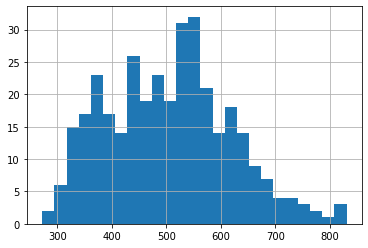

In [10]:
# Histograma de hom_doloso
print('FREQUENCIA DE HOMICIDIO DOLOSO'.center(50))
rj_df.hom_doloso.hist(bins=25, xlabelsize=10);

### Quantidade de Homicídios dolosos pelos anos
Temos uma tendencia negativas no numero de homicidios dolosos atraves dos anos. Um ponto bastante positivo, ainda que nao seja o ideal, mostra uma boa resposta as politicas aplicadas.

In [11]:
hom_dol_sum = rj_df.groupby('vano').hom_doloso.sum()
print("Top 10:  Anos com maior numero de homicidios dolosos")
print(hom_dol_sum.sort_values(ascending=False)[:10])

Top 10:  Anos com maior numero de homicidios dolosos
vano
1995    8438
1994    8408
1993    7720
1992    7635
1991    7518
1996    7259
1997    6923
2002    6885
2003    6624
2005    6620
Name: hom_doloso, dtype: int64


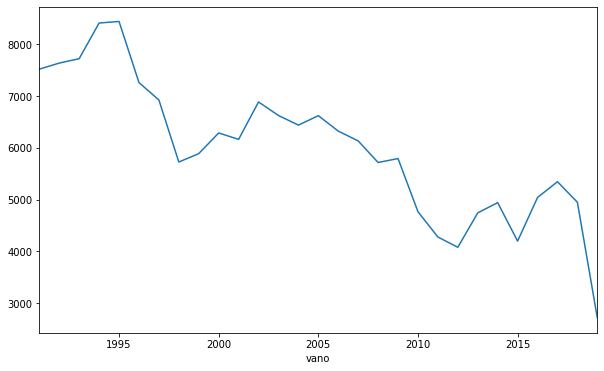

In [12]:
hom_dol_sum.plot(figsize=(10,6));

Gráficos de linhas ou pontos são normalmente usados para controlar alterações ao longo do tempo e para facilitar a identificação de tendências ou de anomalias. As categorias são mostradas ao longo do eixo x e as estatísticas são mostradas ao longo do eixo y. 

                   Roubo em Coletivo                   


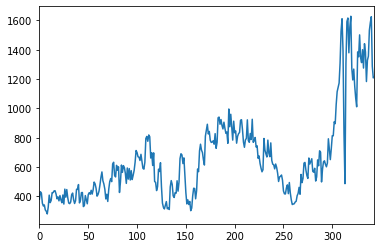

In [13]:
print("Roubo em Coletivo".center(55))
rj_df.roubo_em_coletivo.plot();

## Quantidade de roubo em coletivos pelos meses


In [14]:
rou_coletivo_sum = rj_df.groupby('mes').roubo_em_coletivo.sum()
print('TOP 5: MESES COM MAIOR NUMERO DE ROUBOS EM COLETIVOS')
print(rou_coletivo_sum.sort_values(ascending=False)[:5])

TOP 5: MESES COM MAIOR NUMERO DE ROUBOS EM COLETIVOS
mes
5    21258
4    20674
3    20518
8    19373
6    19373
Name: roubo_em_coletivo, dtype: int64


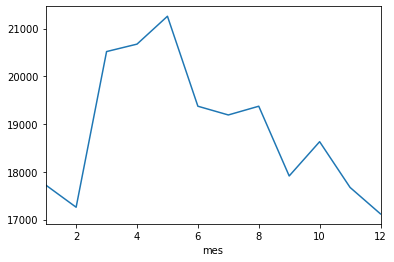

In [15]:
rou_coletivo_sum.plot()

## Conclusão

Diante do exposto, percebe-se que há uma tendência negativa nos casos de homicídios dolososo nesses 28 anos - o que mostra uma efitividade nas politicas aplicadas.

Foi feita apenas uma análise superficial dos dados, mas nota-se um conjunto de dados bastante completo. Ao adquirir mais conhecimento pretendo voltar a este projeto para uma análise mais completa.

Se você gostou desta analise ou deseja iniciar uma discussão, deixe um comentário!